# RQ5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dateparse (time_in_secs):
    return pd.to_datetime(time_in_secs,unit='s')

In [3]:
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=2000000, parse_dates=['timestamp_created', 'timestamp_updated', 'author.last_played'], date_parser=dateparse)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 23 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unnamed: 0                      int64         
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   language                        object        
 5   review                          object        
 6   timestamp_created               datetime64[ns]
 7   timestamp_updated               datetime64[ns]
 8   recommended                     bool          
 9   votes_helpful                   int64         
 10  votes_funny                     int64         
 11  weighted_vote_score             float64       
 12  comment_count                   int64         
 13  steam_purchase                  bool          
 14  received_for_free               bool          
 15

#### 1 - Plot the top 10 most popular reviewers and the number of reviews.

I look at the "author.num_reviews" variable to see how many reviews a person has done for a given application. I add up the various values that the variable takes for the various applications to see the total number of reviews that a given person has made. Finally, I group these values by the author's name (or better, by the author's identification code -> "author.steamid").

I sort in descending order to see which are the most popular authors.

In [5]:
dataset.groupby(["author.steamid"])["author.num_reviews"].sum().sort_values(ascending=False).head(10)

author.steamid
76561197974092119    24206
76561198116879965    23975
76561198125392509    20944
76561197960373660    20685
76561198045381877    16624
76561198094803808    15752
76561198030784015    13891
76561198118629775    13738
76561198013146396    11489
76561198191189787    11027
Name: author.num_reviews, dtype: int64

<AxesSubplot:title={'center':'Reviews by author'}, xlabel='author.steamid', ylabel='Number of reviews'>

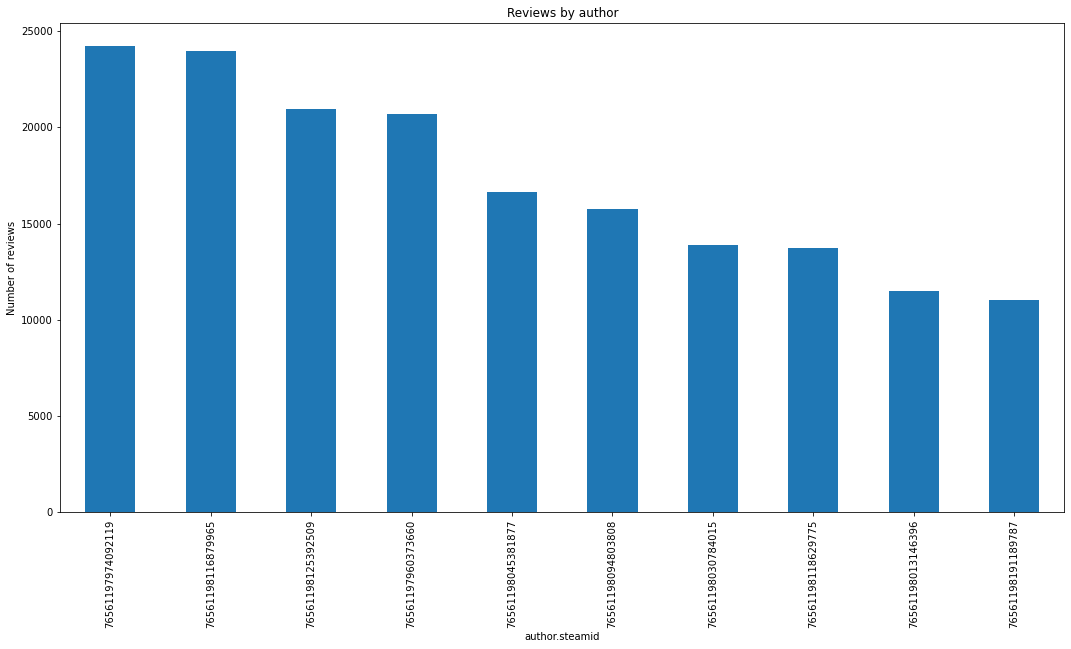

In [6]:
dataset.groupby(["author.steamid"])["author.num_reviews"].sum().sort_values(ascending=False).head(10).plot.bar(figsize=(18,9), xlabel='author.steamid', ylabel='Number of reviews', title='Reviews by author')

#### 2 - What applications did the most popular author review?

I consider the identification code of the most popular author and I check which applications he has reviewed.

In [7]:
dataset[dataset['author.steamid']==76561197974092119].app_name.unique()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod",
       "Sid Meier's Civilization V"], dtype=object)

In [8]:
dataset[dataset['author.steamid']==76561197974092119]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
468155,468155,292030,The Witcher 3: Wild Hunt,15899913,polish,Ciesze się że w ogóle mi działa ^^\n\n\n\n\n\n,2015-05-19 13:28:37,2015-05-19 13:28:37,True,86,...,False,False,False,76561197974092119,1776,3468,665.0,0.0,371.0,2016-07-08 23:12:25
522006,522007,70,Half-Life,12267334,polish,klasyka,2014-09-27 22:19:33,2014-09-27 22:19:33,True,2,...,False,False,False,76561197974092119,1774,3456,1389.0,0.0,1387.0,2019-05-27 17:13:09
574858,574859,240,Counter-Strike: Source,43593853,polish,[h1]꧁ GRA LEGENDA ꧂ [/h1] ...,2018-07-17 22:21:17,2018-07-17 22:21:17,True,4,...,False,False,False,76561197974092119,1774,3456,7946.0,0.0,7946.0,2012-09-09 07:00:00
655868,655869,420,Half-Life 2: Episode Two,44688869,polish,SKRZYDALTA REKOMENDACJA * \n\n[h1]꧁ CIEKAWE C...,2018-09-11 20:46:28,2018-09-11 20:46:28,True,7,...,False,True,False,76561197974092119,1774,3456,87.0,0.0,82.0,2020-02-12 23:03:09
896474,896475,620,Portal 2,644900,polish,SKRZYDALTA REKOMENDACJA *\n[h1]꧁GRA Z NAJLEPSZ...,2011-07-05 21:25:34,2018-12-08 23:54:24,True,6,...,False,True,False,76561197974092119,1774,3446,4835.0,0.0,4833.0,2020-07-13 17:14:16
1237841,1237842,4000,Garry's Mod,44574142,polish,[h1]꧁ WIECZNIE ŻYWY … ꧂ [/h1] \nGra mnie zaws...,2018-09-04 23:00:29,2018-09-06 15:59:54,True,14,...,False,False,False,76561197974092119,1774,3462,963.0,0.0,963.0,2016-02-08 22:57:20
1605174,1605175,8930,Sid Meier's Civilization V,49019196,polish,[h1]꧁ CYWILIZACJA꧂ [/h1] \nfani gatunku beda z...,2019-02-16 00:58:36,2019-02-16 00:58:36,True,3,...,False,False,False,76561197974092119,1774,3462,889.0,0.0,889.0,2018-05-04 14:23:47


#### 3 - How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

I check among the apps he reviewed which ones he bought on steam and which ones he didn't buy on steam and how many are these apps.

In [9]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['steam_purchase']==True)].app_name.unique()

array([], dtype=object)

In [10]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['steam_purchase']==False)].app_name.unique()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod",
       "Sid Meier's Civilization V"], dtype=object)

In [11]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['steam_purchase']==False)].app_name.nunique()

7

I see that this person hasn't bought any apps on steam.

I check how many apps the author has received for free and how many are these apps.

In [12]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True)].app_name.unique()

array(['Half-Life 2: Episode Two', 'Portal 2'], dtype=object)

In [13]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True)].app_name.nunique()

2

I calculate the percentage of apps received for free.

In [14]:
ds1=dataset[dataset['author.steamid']==76561197974092119].app_name.nunique()
ds2=dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True)].app_name.nunique()
perc1=ds2/ds1*100
perc1

28.57142857142857

I check how many apps the author has not received for free and how many are these apps.

In [15]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False)].app_name.unique()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       "Garry's Mod", "Sid Meier's Civilization V"], dtype=object)

In [15]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False)].app_name.nunique()

5

I calculate the percentage of apps not received for free.

In [16]:
ds3=dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False)].app_name.nunique()
perc2=ds3/ds1*100
perc2

71.42857142857143

#### 4 - How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

I check among the apps that he has reviewed and received for free which apps he recommended and which he did not recommend.

In [17]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True) & (dataset['recommended']==True)].app_name.unique()

array(['Half-Life 2: Episode Two', 'Portal 2'], dtype=object)

In [18]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==True) & (dataset['recommended']==False)].app_name.unique()

array([], dtype=object)

I check among the apps that he has reviewed and he has not received for free which apps he has recommended and which he has not recommended

In [19]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False) & (dataset['recommended']==True)].app_name.unique()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       "Garry's Mod", "Sid Meier's Civilization V"], dtype=object)

In [20]:
dataset[(dataset['author.steamid']==76561197974092119) & (dataset['received_for_free']==False) & (dataset['recommended']==False)].app_name.unique()

array([], dtype=object)